**Name:** Thushal Babukumar

**Student-ID:** 46154469

# Introduction
1. The notebook discusses gender and age classification tasks using both conventional machine learning models and Deep Neural Network models.

2. Comments in code blocks explain the working of the code. 

3. The notebook is split into Gender classification and Age classification.

4. Each code block is preceded by statements and succeeded by observations/comments wherever found applicable.

5. A seperate discussion section is added at the end of each section wherever found applicable.

#### Mouting the local google drive & importing required libraries

In [3]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [4]:
import numpy as np
from os.path import join
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
import tensorflow as tf
from tensorflow import keras
from keras import losses
from keras.models import Model
from keras.layers import Flatten, Dense
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score

# Gender Classification

In this section we will discuss the different models used for a gender calssfication task and evaluate results of each model and pick the final best performing model.

The section is split into (i) Pre-processing of data (ii) Conventional Machine Learning model & discussions (iii) Deep Neural Network models & discussions

#### Pre-processing of data

In [5]:
 # Change to directory where datasets are located 
dataset_directory = '/content/drive/MyDrive/21comp8220/proj/image_dataset/age_subset_4' 

In [20]:
#using code stub provided with functions to create labels 

#function for gender labels 
def transform_labels_gender(labels_vec):
  return np.array([int(x[0]) for x in labels_vec])

def transform_labels_g(labels_vec):
  return transform_labels_gender(labels_vec)


 


# loading labels for training and validation
labels_train = np.load(join(dataset_directory, 'train_labels.npy'))
labels_val = np.load(join(dataset_directory, 'val_labels.npy'))


#generating labels for gender for both training and validation
labels_train_gender = transform_labels_g(labels_train)
labels_val_gender = transform_labels_g(labels_val)

print('Original labels are of the form "gender-age":', labels_train[:10])

print('\nFirst 10 values of training labels for gender:', labels_train_gender[:10])


print('\nFemale is 0 & Male is 1\n')



Original labels are of the form "gender-age": ['1-48' '1-48' '1-48' '1-48' '1-48' '1-48' '1-48' '1-48' '1-48' '1-48']

First 10 values of training labels for gender: [1 1 1 1 1 1 1 1 1 1]

Female is 0 & Male is 1



In [21]:
# code stub provided to pre-process data
# Images are of size (100,100,3)


# loading images for training, validation, public_test, private_test

image_size= 100
images_train = np.load(join(dataset_directory, 'train_images.npy'))
images_val = np.load(join(dataset_directory, 'val_images.npy'))
images_test_public = np.load(join(dataset_directory, 'test_images.npy'))
images_test_private = np.load(join(dataset_directory, 'test_priv_images.npy'))

#reshaping images to (100,100,3) sizes

images_train = images_train.reshape([-1, image_size, image_size, 3]) / 255.0
images_test_private = images_test_private.reshape([-1, image_size, image_size, 3]) / 255.0
images_val = images_val.reshape([-1, image_size, image_size, 3]) / 255.0
images_test_public = images_test_public.reshape([-1, image_size, image_size, 3]) / 255.0

print('Number of images in training data:',images_train.shape[0], '\n\nSize of each image:', images_train.shape[1:])

print('\nNumber of images in Validation data:',images_val.shape[0], '\n\nSize of each image:', images_val.shape[1:])

#print(images_test_public.shape)

#print(labels_val_age[:10])
#print(labels_val_gender[:10])


Number of images in training data: 11580 

Size of each image: (100, 100, 3)

Number of images in Validation data: 1332 

Size of each image: (100, 100, 3)


#### Conventional Machine Learning Model

RandomFrorestClassifier with n_estimators=500, max_leaf_nodes=16

In [23]:
# Initialize Randomforest model
from sklearn.ensemble import RandomForestClassifier
rfc_clf = RandomForestClassifier(n_estimators = 500, max_leaf_nodes = 16, n_jobs = -1, random_state = 42 )

# Fit the model
rfc_clf.fit(images_train.reshape(-1,30000), labels_train_gender)




RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=16, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [24]:
# Accuracy of the model
rfc_prediction = rfc_clf.predict(images_val.reshape(-1,30000))
print('Accuracy on validation set for default model:', round(accuracy_score(labels_val_gender,rfc_prediction)*100, 2),'%')


Accuracy on validation set for default model: 74.17 %


<br/>

RandomFrorestClassifier with n_estimators=700, max_leaf_nodes=200

In [25]:
#Chaning n_estimators and max_leaf_nodes to check improvement on the model
rfc_clf1 = RandomForestClassifier(n_estimators = 700, max_leaf_nodes = 200, n_jobs = -1, random_state = 42 )
rfc_clf1.fit(images_train.reshape(-1,30000), labels_train_gender)
rfc_prediction = rfc_clf1.predict(images_val.reshape(-1,30000))
print('Accuracy on validation set after increasing n_estimators and max_leaf_nodes:', round(accuracy_score(labels_val_gender,rfc_prediction)*100, 2),'%')

Accuracy on validation set after increasing n_estimators and max_leaf_nodes: 77.78 %


<br/>

RandomFrorestClassifier with n_estimators=700, max_leaf_nodes=500

In [26]:
#Keeping n_estimators constant and increasing max_leaf_nodes to check improvement on the model
rfc_clf2 = RandomForestClassifier(n_estimators = 700, max_leaf_nodes = 500, n_jobs = -1, random_state = 42 )
rfc_clf2.fit(images_train.reshape(-1,30000), labels_train_gender)
rfc_prediction = rfc_clf2.predict(images_val.reshape(-1,30000))
print('Accuracy on validation set after increasing max_leaf nodes:', round(accuracy_score(labels_val_gender,rfc_prediction)*100, 2),'%')

Accuracy on validation set after increasing max_leaf)nodes: 77.63 %


<br/>

RandomFrorestClassifier with n_estimators=900, max_leaf_nodes=200

In [27]:
#Keeping the best max_leaf_nodes and increasing n_estimators to check improvement on the model
rfc_clf1 = RandomForestClassifier(
n_estimators = 900, max_leaf_nodes = 200, n_jobs = -1, random_state = 42 )
rfc_clf1.fit(images_train.reshape(-1,30000), labels_train_gender)
rfc_prediction = rfc_clf1.predict(images_val.reshape(-1,30000))
print('Accuracy on validation set:', round(accuracy_score(labels_val_gender,rfc_prediction)*100, 2),'%')

Accuracy on validation set: 77.78 %


<br/>

Parameters in RandomForestClassifier

In [28]:
import pprint
pp = pprint.PrettyPrinter(indent=4)
pp.pprint(rfc_clf.get_params())

{   'bootstrap': True,
    'ccp_alpha': 0.0,
    'class_weight': None,
    'criterion': 'gini',
    'max_depth': None,
    'max_features': 'auto',
    'max_leaf_nodes': 16,
    'max_samples': None,
    'min_impurity_decrease': 0.0,
    'min_impurity_split': None,
    'min_samples_leaf': 1,
    'min_samples_split': 2,
    'min_weight_fraction_leaf': 0.0,
    'n_estimators': 500,
    'n_jobs': -1,
    'oob_score': False,
    'random_state': 42,
    'verbose': 0,
    'warm_start': False}


<br/>

Using RandomizedSearchCV to select best parameters. Setting a range of values for each parameter before using the randomized search.



In [29]:
from sklearn.model_selection import RandomizedSearchCV

# Setting a range of values for the number of trees in each training phase
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 1000, num = 3)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Setting a range of values for the max_depth for each tree
max_depth = [int(x) for x in np.linspace(10, 100, num = 3)]
max_depth.append(None)

# Setting a range of values for the minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Setting a range of values for the minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pp.pprint(random_grid)


{   'bootstrap': [True, False],
    'max_depth': [10, 55, 100, None],
    'max_features': ['auto', 'sqrt'],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10],
    'n_estimators': [200, 600, 1000]}


<br/>

Random search parameters: using CV=2, n_iter=2 due to training time constraints

In [42]:
rf = RandomForestClassifier(n_jobs = -1)

rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 2, cv = 2, verbose=2, random_state=42 )
# Fit the random search model
rf_random.fit(images_train.reshape(-1,30000), labels_train_gender)

Fitting 2 folds for each of 2 candidates, totalling 4 fits
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=55, bootstrap=True 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=55, bootstrap=True, total= 1.8min
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=55, bootstrap=True 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.8min remaining:    0.0s


[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=55, bootstrap=True, total= 1.7min
[CV] n_estimators=200, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=100, bootstrap=False 
[CV]  n_estimators=200, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=100, bootstrap=False, total= 2.6min
[CV] n_estimators=200, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=100, bootstrap=False 
[CV]  n_estimators=200, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=100, bootstrap=False, total= 2.6min


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:  8.8min finished


RandomizedSearchCV(cv=2, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

<br/>

Best parameters given by RandomizedSearchCV method

In [43]:
X = rf_random.best_params_

pp.pprint(X)


{   'bootstrap': False,
    'max_depth': 100,
    'max_features': 'auto',
    'min_samples_leaf': 4,
    'min_samples_split': 10,
    'n_estimators': 200}


<br/>

Using the best parameters given by random search to build a new model and check if there is any improvement on model performance.

In [57]:
from sklearn.ensemble import RandomForestClassifier
rf_best = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=100, max_features='auto',
                       max_leaf_nodes=200, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=700,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [58]:

rf_best.fit(images_train.reshape(-1,30000), labels_train_gender)
y_pred = rf_best.predict(images_val.reshape(-1,30000))
print('Accuracy on validation set:', round(accuracy_score(labels_val_gender,y_pred)*100, 2),'%')

Accuracy on validation set: 77.4 %


<br />


**Discussion on conventional Machine learning for gender classfication**

---
1. I chose RandomForestClassifier because it trains an ensemble of DecisionTrees via bagging method. 
</br>

2. RandomForestClassifier contains all the hyperparameters required to tune the performance of DecisionTree and a BaggingClassifier.  
</br>

3. Initially the classifier was trained on default hyperparameter values as discussed in the lecture notes:

        n_estimators=500  ====> Number of DecisionTress used to train
        max_leaf_nodes=16 ====> Maximum number of leaf nodes in a DecisionTree
        n_jobs=-1         ====> Use all available cores    

        The classifier gave me an accuracy of 74.7%
</br>

4. To check the impact of max_leaf_nodes on accuracy, I changed the value to 200 and increased n_estimators to 700.

        The classifier gave me an accuracy of 77.78%, which is an increase on the default values. We call this model base_model.

</br>

5. Further testing showed that increase in max_leaf_nodes decreases accuracy. A value of 500 gives accuracy of around 77.63%
</br>

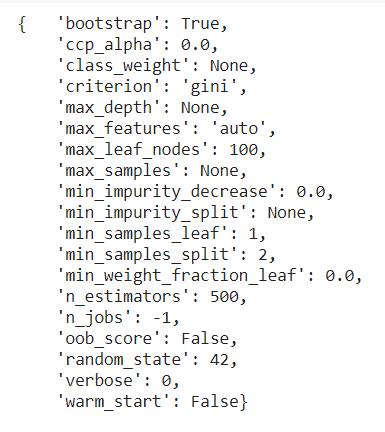




</br>

6. Created parameter grid with a range of values for each parameter and used RandomizedSearchCV to train the model with different combinations of parameter values. 
</br>

7. In RandomizedSearchCV the 'n_iter' value sets the number of combinations to try during the training phase. And CV value is the number of cross validation folds to use to avoid over fitting. For accurate results we need to train the model for various combinations of *n_iter* value. But since training time increases I used a value of 2.
</br>

8. After obtaining the results from the RandomizedSearchCV we used the optimized parameters given by RandomizedSearchCV to train a new model.

    Best parameters given by RandomizedSearchCV:

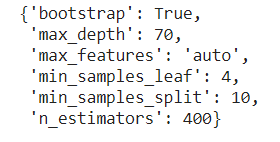

        I ignored the n_estimators value outputted by randomized search since I used a small n_iter value (hence bound to be inaccurate) and 
        used the n_estimators and max_leaf_nodes used in the base_model. This increased the accuracy of the nodel to 77.85%

        **When I re-ran the cells the accuracy score reduced to 77.4%, but the first time I ran the cell I got a score of 77.85%
    
- - - -
</br>

<span style="color:BLUE">**CONCLUSION**</span> 
1. We can increase n_iter in RandomizedSearchCV to give more accurate results for hyperparameter tuning and help build out the best model. 
2. Increasing n_iter means an increase in training time which is not worth it due to ever so slight improvement in model performance. 
3. A trade-off between training time and model performance is worth only if the model performance increases drastically.
4. We use the best conventional model for testing on public and private test sets.

          X = np.argmax(rf_best.predict(images_test_public), axis=-1)
          
          import pandas as pd 
          pd.DataFrame(X).to_csv('/content/drive/My Drive/facial-gender-recognition/46154469-CONV.csv')
          
          df =pd.read_csv('/content/drive/My Drive/facial-gender-recognition/46154469-CONV.csv', index_col=0)
          
          df.index.names = ['ID']
          
          df.columns = ['Prediction']
          df.to_csv('/content/drive/My Drive/facial-gender-recognition/46154469-CONV.csv')

4. Since we are passing the images as stream of 1D arrays, we are not extracting the higher level features required for classification.

5. We can use Convolution Neural Networks to read images in 2D dimensions and extract high level feature which is bound to increase the performance of the models.

6. Next step is to train Deep Neural Networks and check improvement in classification tasks.









<br/>

#### Deep Neural Network Models

1. We first build a simple DNN model to compare its performance with the conventional machine learning model.

2. The model first consists of a Flatten layer which does the same job as (.reshape) in conventional model.

3. Then we add two hidden dense layers of 500 and 100 neurons and final output dense layer with 2 neurons since we have two classes 0 and 1.

4. We train the model for 5 epochs.

In [ ]:
import tensorflow as tf
from tensorflow import keras

# initializing sequential model
model = keras.models.Sequential()

#Adding the different layers in our sequential model
model.add(keras.layers.Flatten(input_shape=[100,100,3]))
model.add(keras.layers.Dense(500, activation='relu'))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(4, activation='sigmoid'))
model.compile(loss="sparse_categorical_crossentropy",
 optimizer='SGD',
 metrics=["accuracy"])

#Training our model for 5 epochs
history = model.fit(images_train, labels_train_gender, batch_size=32, validation_data=(images_val, labels_val_gender), epochs=5)

Epoch 1/5
362/362 [==============================] - 5s 6ms/step - loss: 0.6759 - accuracy: 0.6168 - val_loss: 0.5665 - val_accuracy: 0.7245
Epoch 2/5
362/362 [==============================] - 2s 5ms/step - loss: 0.5956 - accuracy: 0.6851 - val_loss: 0.5186 - val_accuracy: 0.7598
Epoch 3/5
362/362 [==============================] - 2s 5ms/step - loss: 0.5624 - accuracy: 0.7151 - val_loss: 0.4927 - val_accuracy: 0.7695
Epoch 4/5
362/362 [==============================] - 2s 5ms/step - loss: 0.5433 - accuracy: 0.7320 - val_loss: 0.4871 - val_accuracy: 0.7568
Epoch 5/5
362/362 [==============================] - 2s 5ms/step - loss: 0.5298 - accuracy: 0.7349 - val_loss: 0.4806 - val_accuracy: 0.7823


In [ ]:
#Testing the model on validation set by predicting the label for validation set
y_pred  =np.argmax(model.predict(images_val), axis=-1)

accuracy_score(labels_val_gender, y_pred)

0.7822822822822822

**Observation**

1. We see that their is a slight improvement in performance compared to conventional machine learning. 
2. Additionally, huge improvement in training time given that we are using GPU's and tensors as the dataformat in training phase.  
3. Next step we try adding an additional hidden layers with 1024 neurons to see if there is an improvement.

**CHANGES MADE TO THE MODEL**

1. We add an additional dense layer consisting of 1024 neurons.

2. We make use of call backs to introduce learning_rate in our model. 

4. The weights that are updated during training phases is referred to learning rate.

5. Learning rate is used to skip weights which are not changed during training phase. 

6. Keras as an in-built function ReduceLROnPlateau which we can use to increase training time.

7. The problem of exploding gradients is dealt with by introducing clip value in SGD optimizer.

In [ ]:
import tensorflow as tf
from tensorflow import keras



# performing the same steps as previous model

model = keras.models.Sequential()

# Adding one additional dense layer to check if performance increases

model.add(keras.layers.Flatten(input_shape=[100,100,3]))
model.add(keras.layers.Dense(500, activation='relu'))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(1024,  activation='relu'))
model.add(keras.layers.Dense(4, activation='sigmoid'))


# introducting Clipvalue in optimizer SGD
optimizer = keras.optimizers.SGD(clipvalue=1.0)

#compiling the model
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

#Introducing learning_rate through callbacks

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                              patience=5, min_lr=0.001)

#training the model
history = model.fit(images_train, labels_train_gender, batch_size=32, validation_data=(images_val, labels_val_gender), epochs=5, callbacks=[reduce_lr])

Epoch 1/5
362/362 [==============================] - 6s 7ms/step - loss: 0.6944 - accuracy: 0.5843 - val_loss: 0.6366 - val_accuracy: 0.6637
Epoch 2/5
362/362 [==============================] - 2s 6ms/step - loss: 0.6103 - accuracy: 0.6815 - val_loss: 0.5337 - val_accuracy: 0.7455
Epoch 3/5
362/362 [==============================] - 2s 6ms/step - loss: 0.5699 - accuracy: 0.7117 - val_loss: 0.4924 - val_accuracy: 0.7680
Epoch 4/5
362/362 [==============================] - 2s 6ms/step - loss: 0.5424 - accuracy: 0.7288 - val_loss: 0.5190 - val_accuracy: 0.7402
Epoch 5/5
362/362 [==============================] - 2s 6ms/step - loss: 0.5369 - accuracy: 0.7339 - val_loss: 0.4748 - val_accuracy: 0.7650


In [ ]:
y_pred  =np.argmax(model.predict(images_val), axis=-1)

accuracy_score(labels_val_gender, y_pred)

0.765015015015015

**Observation**

1. We see that the model performs worse with the addition of another hidden Dense layer.
This might be because the more layers added, the more complex the model becomes hence it performs bad.

2. Next step is to build a CNN to improve model performance.

<br>

**BUILDING A CNN MODEL**

Since Convolution Neural Networks are specifically used for image classification, we use a CNN network to see if there is an improvement in the accuracy score.

1. We use CONV2D layer with kernel_size as 10 and number of filters as 64
2. We don't use stride because the images are small
2. We introduce a MaxPooling2D layer after each subsequent CNN layers to divide the spatial dimensions by a factor of two.
3. We repeat the CONV2D and MaxPooling2D layers two more times and flatten the resulting output.
4. We feed the output to the Dense model we created in previous step.

In [ ]:

CNN = keras.models.Sequential([
 keras.layers.Conv2D(filters=64, kernel_size=10, input_shape=[100, 100, 3], padding="SAME"),
 keras.layers.MaxPooling2D(pool_size=2),
 keras.layers.Conv2D(filters=128, kernel_size=10,padding="SAME"),
 keras.layers.Conv2D(filters=128, kernel_size=10,padding="SAME"),
 keras.layers.MaxPooling2D(pool_size=2),
 keras.layers.Conv2D(filters=128, kernel_size=10,padding="SAME"),
 keras.layers.Conv2D(filters=128, kernel_size=10,padding="SAME"),
 keras.layers.MaxPooling2D(pool_size=2),
 keras.layers.Flatten(),
 keras.layers.Dense(units=1024, activation='relu'),
 keras.layers.Dropout(0.5),
 keras.layers.Dense(units=500, activation='relu'),
 keras.layers.Dropout(0.5),
 keras.layers.Dense(units=2, activation='sigmoid'),
])

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                              patience=5, min_lr=0.001)
CNN.compile(loss="sparse_categorical_crossentropy", optimizer='SGD', metrics=["accuracy"])



Visualizing the model using plot_model available in keras

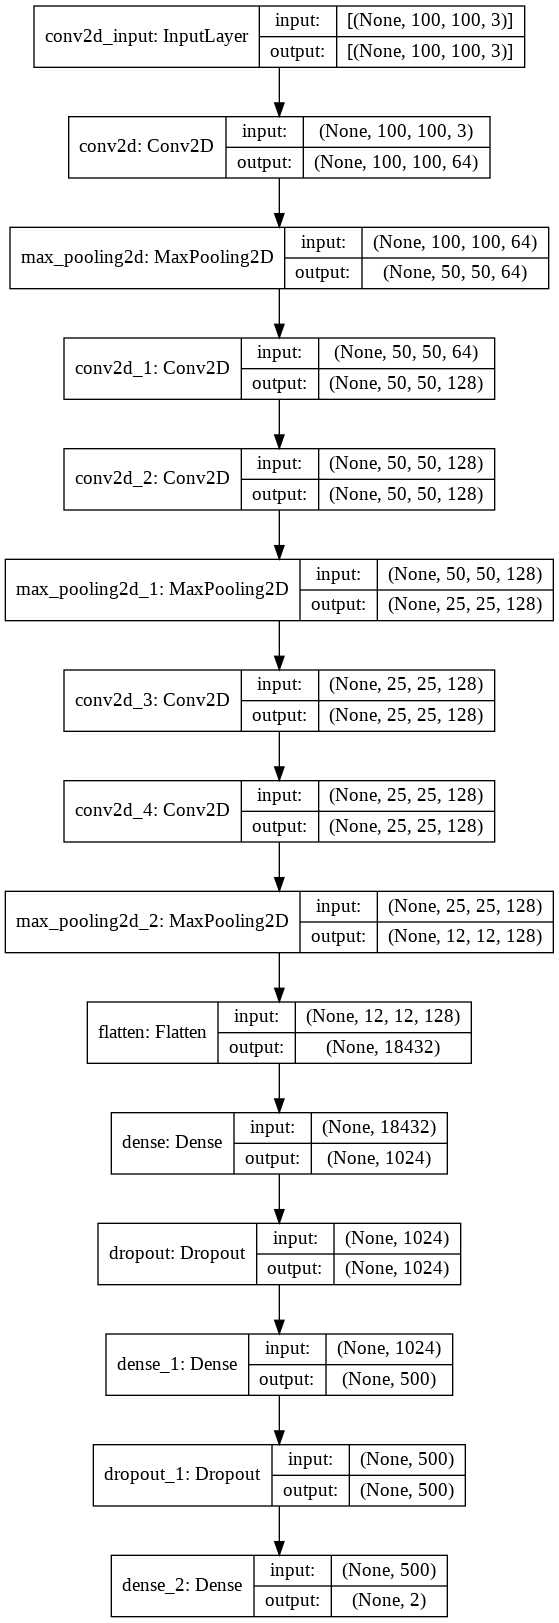

In [ ]:
tf.keras.utils.plot_model(CNN, show_shapes=True, show_layer_names=True)

In [ ]:
history_CNN = CNN.fit(images_train, labels_train_gender, batch_size=32, validation_data=(images_val, labels_val_gender), epochs=5, callbacks=[reduce_lr])

Epoch 1/5
362/362 [==============================] - 59s 127ms/step - loss: 0.6206 - accuracy: 0.6598 - val_loss: 0.5202 - val_accuracy: 0.7500
Epoch 2/5
362/362 [==============================] - 45s 124ms/step - loss: 0.5366 - accuracy: 0.7383 - val_loss: 0.4775 - val_accuracy: 0.7763
Epoch 3/5
362/362 [==============================] - 44s 121ms/step - loss: 0.4871 - accuracy: 0.7712 - val_loss: 0.4618 - val_accuracy: 0.7890
Epoch 4/5
362/362 [==============================] - 45s 123ms/step - loss: 0.4560 - accuracy: 0.7892 - val_loss: 0.4124 - val_accuracy: 0.8168
Epoch 5/5
362/362 [==============================] - 44s 123ms/step - loss: 0.4276 - accuracy: 0.8008 - val_loss: 0.4082 - val_accuracy: 0.8206


In [ ]:
y_pred  =np.argmax(CNN.predict(images_val), axis=-1)

print('Accuracy after using CNN model:', round(accuracy_score(labels_val_gender, y_pred)*100,2), '%')

Accuracy after using CNN model: 82.06 %


Let us visualize the output of the first convolution layer. The layer has 64 filters, so we will have 64 feature maps.

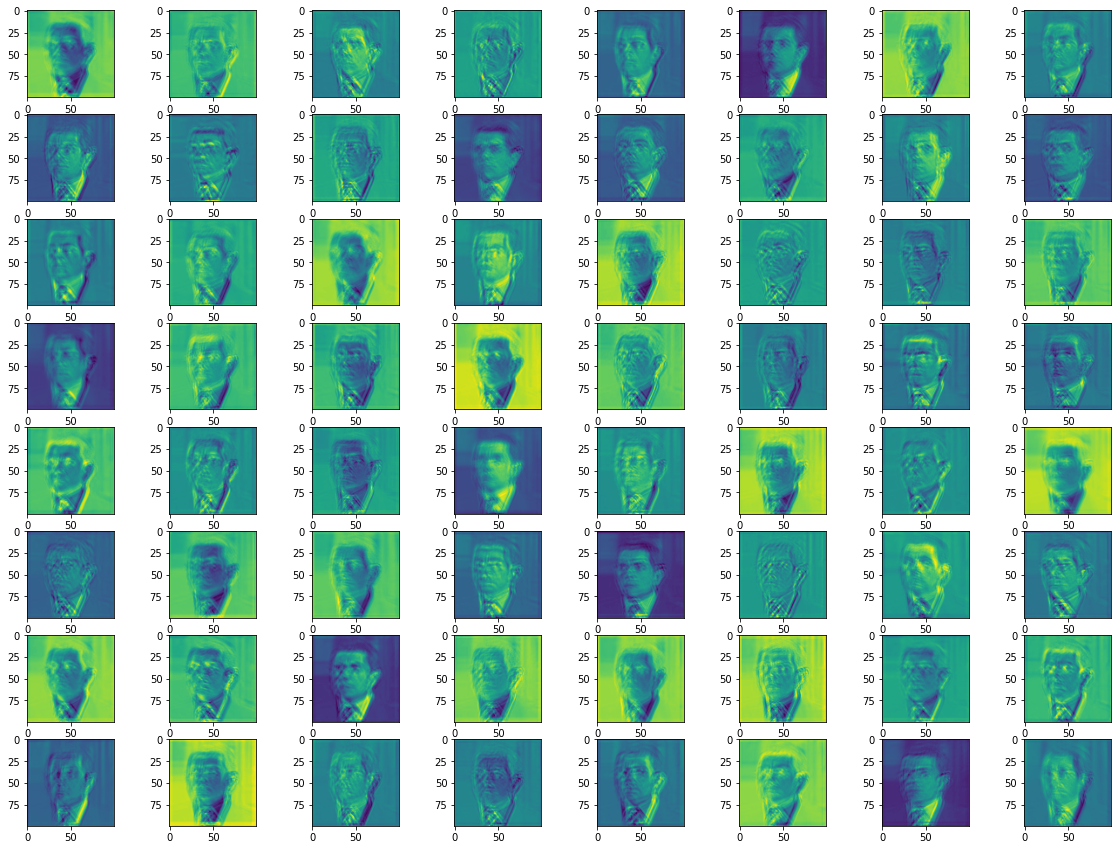

In [ ]:
#Since we are visualizing only layer one we create a impromptu model from our existing model with input layers and only the output of the first conv layer
model = Model(inputs=CNN.inputs , outputs=CNN.layers[0].output)

#import pyplot from matplotlib
from matplotlib import pyplot

# Pass only one image into our model
features = model.predict(y.reshape((1,) + y.shape))

#creating a grid of 8x8 since there are 64 filters, so each filter image can occupy one place on the grid.
fig = pyplot.figure(figsize=(20,15))
for i in range(1,features.shape[3]+1):

    pyplot.subplot(8,8,i)
    pyplot.imshow(features[0,:,:,i-1] , cmap='viridis')
    
pyplot.show()

Let us visualize the output of the last Maxpooling layer before flattening the output and passing it on to the dense layer.The layer has 128 filters, so we will have 128 feature maps.

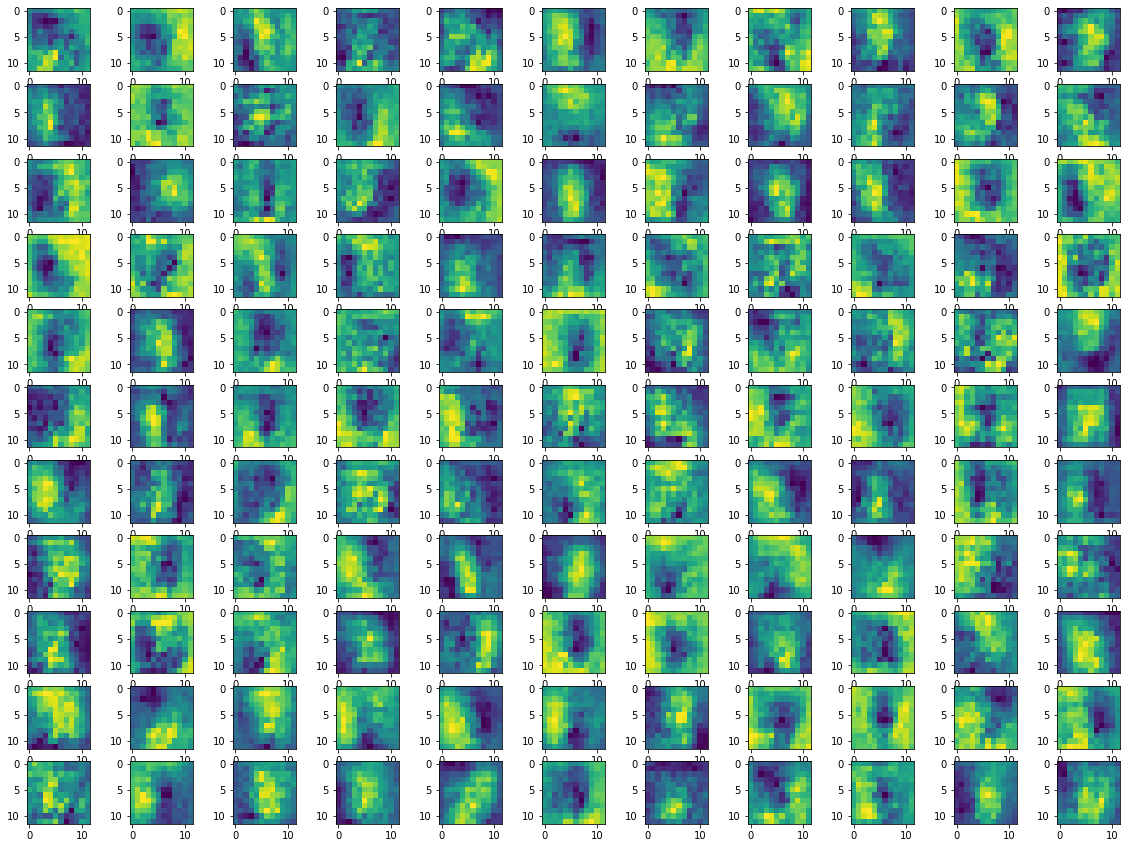

In [ ]:
#using the same method as in the previous block of code

model = Model(inputs=CNN.inputs , outputs=CNN.layers[7].output)

from matplotlib import pyplot


features = model.predict(y.reshape((1,) + y.shape))


fig = pyplot.figure(figsize=(20,15))
for i in range(1,122):

    pyplot.subplot(11,11,i)
    pyplot.imshow(features[0,:,:,i-1] , cmap='viridis')
    
pyplot.show()

We can clearly see that since the last pooling layer before passing it on to the dense layers for classification, only high level features are visualized by the model.

**Observation**

1. We see that the accuracy shoots to 82% with the use of CNN on top of the previously used Dense model. 
2. Since training features is time consuming, we can use pre-trained model for image classification.
3. Models trained on similar classifications tasks can be re-used by using the extracted features from the pre-trained model.
4. Based on this, the next step is to use transfer learning -  pre-trained image classification models which have been trained widely on various images.


<br/>

#### Transfer-learning

**VGG16 pre-trained Model**

1. Initially we use VGG16 model which has altogether 18 CONV2D and MAX_POOLING layers and one output Dense layer.

2. We use input_top=false to not include the output classification layer when importing the model. 


3. We add our own custom Dense layer as output.

4. We train the models for 3 epochs and check the accuracy.

In [ ]:

from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout

# load model without classifier layers
model = VGG16(include_top=False, input_shape=(100, 100, 3))

# add new classifier layers
flat = Flatten()(model.layers[-1].output)

#class1 = Dense(1024, activation='relu')(flat1)

#output dense layer
output = Dense(2, activation='sigmoid')(flat)

# defining the model

model = Model(inputs=model.inputs, outputs=output)

# summarize
model.summary()

58900480/58889256 [==============================] - 1s 0us/step
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 100, 100, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 100, 100, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 100, 100, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 50, 50, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 50, 50, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 50, 50, 128)       147584    
______________________________________________________________

In [ ]:
#compiling the VGG model
model.compile(loss="sparse_categorical_crossentropy", optimizer='sgd', metrics=["accuracy"])

#Training the VGG model
history = model.fit(images_train, labels_train_gender, validation_data=(images_val, labels_val_gender), epochs=3, batch_size=32
                    , callbacks=[reduce_lr])

Epoch 1/3
362/362 [==============================] - 115s 228ms/step - loss: 0.7285 - accuracy: 0.6157 - val_loss: 0.3600 - val_accuracy: 0.8461
Epoch 2/3
362/362 [==============================] - 79s 218ms/step - loss: 0.3713 - accuracy: 0.8346 - val_loss: 0.4006 - val_accuracy: 0.8266
Epoch 3/3
362/362 [==============================] - 79s 218ms/step - loss: 0.3062 - accuracy: 0.8753 - val_loss: 0.3174 - val_accuracy: 0.8769


In [ ]:
y_pred  = np.argmax(model.predict(images_val), axis=-1)

print('Accuracy By using VGG16 model:', round(accuracy_score(labels_val_gender, y_pred),2)*100 ,'%')

Accuracy By using VGG16 model: 88.0 %


**Observation**
1. We see that there are altogether 14,723,906 parameters which are trainable.
2. More number of parameters directly translates to better accuracy since these parameters have been trained on similar classifcation tasks on images.
3. Without doubt, we see the accuracy shoot upto 88% with the use of transfer-learning using VGG-16 model.
4. Next step we add additional dense layers in the classification layer we introduce to see if we can improve the model.

**Adding additional Dense Layers**

1. We add one Dense layer consisting of 1024 neurons right after the output of VGG16 model.
2. We perform the same task as before, flatten the output after the additonal layer.
3. We add another Dense layer consisting of 128 neurons and then add the ouput Dense layer of 2 Neurons.

In [ ]:
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout

# load model without classifier layers
model = VGG16(include_top=False, input_shape=(100, 100, 3))


class1 = Dense(1024, activation='relu')(model.layers[-1].output)

# add new classifier layers
flat = Flatten()(class1)

class2 = Dense(128, activation='relu')(flat)

#output dense layer
output = Dense(2, activation='sigmoid')(class2)

# defining the model

VGG_model = Model(inputs=model.inputs, outputs=output)

# summarize
VGG_model.summary()

58900480/58889256 [==============================] - 0s 0us/step
Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 100, 100, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 100, 100, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 100, 100, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 50, 50, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 50, 50, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 50, 50, 128)       147584    
____________________________________________________________

In [ ]:
#compiling the VGG model
VGG_model.compile(loss="sparse_categorical_crossentropy", optimizer='sgd', metrics=["accuracy"])

#Training the VGG model
history = VGG_model.fit(images_train, labels_train_gender, validation_data=(images_val, labels_val_gender), epochs=3, batch_size=32
                    , callbacks=[reduce_lr])

Epoch 1/3
362/362 [==============================] - 81s 220ms/step - loss: 0.5564 - accuracy: 0.7261 - val_loss: 0.3364 - val_accuracy: 0.8634
Epoch 2/3
362/362 [==============================] - 79s 219ms/step - loss: 0.3258 - accuracy: 0.8649 - val_loss: 0.2965 - val_accuracy: 0.8844
Epoch 3/3
362/362 [==============================] - 79s 219ms/step - loss: 0.2874 - accuracy: 0.8843 - val_loss: 0.2918 - val_accuracy: 0.8926


In [ ]:
y_pred  = np.argmax(VGG_model.predict(images_val), axis=-1)

print('Accuracy By using VGG16 model with additional Dense layers:', round(accuracy_score(labels_val_gender, y_pred),3)*100 ,'%')

Accuracy By using VGG16 model with additional Dense layers: 89.3 %


A plot to visualize validation loss and training loss

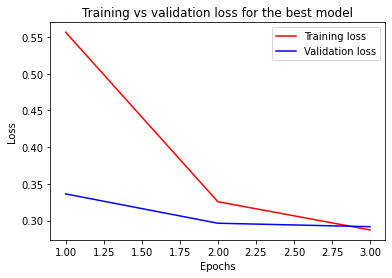

In [ ]:
import matplotlib.pyplot as plt
loss =[0.5564,0.3258, 0.2874 ]
val_loss = [0.3364,0.2965,  0.2918 ]

epochs = range(1, len(loss) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'r', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training vs validation loss for the best model')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

**Observation**

1. We see that the model improves slightly with the addition of extra Dense in our customer classification layer.
2. We use the best model for testing on the Public test set and Private test set.

        X = np.argmax(model.predict(images_test_public), axis=-1)

        import pandas as pd 
        pd.DataFrame(X).to_csv('/content/drive/My Drive/facial-gender-recognition/46154469-DNN.csv')

        df =pd.read_csv('/content/drive/My Drive/facial-gender-recognition/46154469-DNN.csv', index_col=0)

        df.index.names = ['ID']

        df.columns = ['Prediction']
        df.to_csv('/content/drive/My Drive/facial-gender-recognition/46154469-DNN.csv')

<br/>

# Age Classification
In this section we will discuss the different models used for an age calssfication task and evaluate results of each model and pick the final best performing model.

The section is split into (i) Pre-processing of data (ii) Conventional Machine Learning model & discussion (iii) Deep Neural Network models 

#### Pre-processing of data

Steps taken to deal with age data:

1. We group a range of close age values and encode them because the features distinguishing closely relates age groups is not going to be that different. For example its hard for humans to distinguish a 25 year old from a 28 year old.
2. Hence if we use just the age number of individuals as our y value our model is going to perform really poorly.
3. Encoding a range of closely related ages and representing that range as a single group will be needed to make sure our model performs better.

In [ ]:

# Using the same code stub functions but modifiying it generate age labels

#function for age labels, we use x[2:] to get the 3rd value of the string, since the lables are of the format string(gender-string)

def transform_labels_age(labels_vec):
  return np.array([int(x[2:]) for x in labels_vec])

def transform_labels_a(labels_vec):
  return transform_labels_age(labels_vec)

#generating labels for age data

labels_train_age= transform_labels_a(labels_train)
labels_val_age = transform_labels_a(labels_val)

Code to encode a range of closely related ages.

0 (if the age of the person is 6-20), 1 (ages 25-30), 2 (ages 42-48), or 3 (ages 60-98)

In [ ]:
# We convert to list first to make it easier to handle
labels_train_age1 = labels_train_age.tolist()
labels_val_age1 = labels_val_age.tolist()

# We create a for loop to group range of ages into groups 0,1,2,3

#for loop to group training age data

for i in labels_train_age1:
  if i in range(6,21):
    labels_train_age1[labels_train_age1.index(i)] = 0
  elif i in range(25,31):
    labels_train_age1[labels_train_age1.index(i)] = 1
  elif i in range(42,49):
    labels_train_age1[labels_train_age1.index(i)] = 2
  elif i in range(60,99):
    labels_train_age1[labels_train_age1.index(i)] = 3

# for loop to group validation age data
for i in labels_val_age1:
  if i in range(6,21):
    labels_val_age1[labels_val_age1.index(i)] = 0
  elif i in range(25,31):
    labels_val_age1[labels_val_age1.index(i)] = 1
  elif i in range(42,49):
    labels_val_age1[labels_val_age1.index(i)] = 2
  elif i in range(60,99):
    labels_val_age1[labels_val_age1.index(i)] = 3

# converting the list back to numpy arrays

labels_train_age = np.array(labels_train_age1)
labels_val_age = np.array(labels_val_age1)


# Labels of age data after grouping
print('Age groups in training data:',set(labels_train_age))
print('Age groups in validation data:',set(labels_val_age))


Age groups in training data: {0, 1, 2, 3}
Age groups in validation data: {0, 1, 2, 3}


#### Conventional Machine Learning Model for Age classification

We make use of the same best RandomForestClassifier used for Gender Classification

In [ ]:
rf_best 

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=70, max_features='auto',
                       max_leaf_nodes=200, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [ ]:

rf_best.fit(images_train.reshape(-1,30000), labels_train_age)
y_pred = rf_best.predict(images_val.reshape(-1,30000))
print('Accuracy on validation set:', round(accuracy_score(labels_val_age,y_pred)*100, 2),'%')

Accuracy on validation set: 40.69 %


**Observation**
1. We notice that the accuracy for age classification is drastically less [40%] using our best conventional model.
2. Next we try to use our best Deep Neural Network model to check to see how it performs in age classification.

#### Deep Neural Networks

We use the best performing DNN model for gender classification below. We tweak the last output Dense layer from 2 neurons to 4 neurons since we have 4 different labels.

In [ ]:

# load model without classifier layers
model = VGG16(include_top=False, input_shape=(100, 100, 3))


class1 = Dense(1024, activation='relu')(model.layers[-1].output)

# add new classifier layers
flat = Flatten()(class1)

class2 = Dense(128, activation='relu')(flat)

#output dense layer
output = Dense(4, activation='sigmoid')(class2)

# defining the model

VGG_model = Model(inputs=model.inputs, outputs=output)

# summarize
VGG_model.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 100, 100, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 100, 100, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 100, 100, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 50, 50, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 50, 50, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 50, 50, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 25, 25, 128)       0   

In [ ]:
#compiling the VGG model
VGG_model.compile(loss="sparse_categorical_crossentropy", optimizer='sgd', metrics=["accuracy"])



#Training the VGG model for age classification
history = VGG_model.fit(images_train, labels_train_age, validation_data=(images_val, labels_val_age), epochs=5, batch_size=32
                    , callbacks=[reduce_lr])

Epoch 1/5
362/362 [==============================] - 43s 114ms/step - loss: 1.2915 - accuracy: 0.3849 - val_loss: 1.1624 - val_accuracy: 0.4932
Epoch 2/5
362/362 [==============================] - 38s 106ms/step - loss: 1.1420 - accuracy: 0.4734 - val_loss: 1.1039 - val_accuracy: 0.4962
Epoch 3/5
362/362 [==============================] - 40s 110ms/step - loss: 1.0525 - accuracy: 0.5298 - val_loss: 1.0512 - val_accuracy: 0.5255
Epoch 4/5
362/362 [==============================] - 39s 108ms/step - loss: 0.9559 - accuracy: 0.5789 - val_loss: 1.0986 - val_accuracy: 0.4985
Epoch 5/5
362/362 [==============================] - 39s 109ms/step - loss: 0.8903 - accuracy: 0.6157 - val_loss: 1.0124 - val_accuracy: 0.5375


We observe that the accuracy of our best DNN model for age classification is limited to only 50%

Visualizing the training and validation loss:

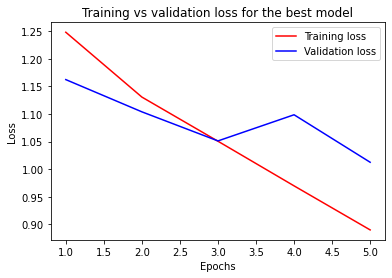

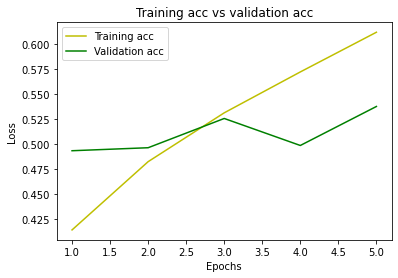

In [ ]:
#plotting training loss vs validation loss
loss =history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(loss) + 1)


plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training vs validation loss for the best model')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

plt.plot(epochs, train_acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'g', label='Validation acc')
plt.title('Training acc vs validation acc')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

**Observation**
1. We notice that validation loss increases at the 3rd epoch, which implies our model is performing poorly for any new data it encounters.
2. The training acc vs validation acc graph shows that our model is clearly suffering from overfitting.
3. The best performing model for gender classification which evaluated at 89% accuracy only could manage around 53% accuracy for age classification.


**Why is the model performing poorly?... And how can we improve the model?**

1. The model is performing poorly on age classification because the features required to be learned by a model to classify the age of a person accurately is supposed to be more nuanced. 

2. Just recognizing high level features of images will suffice for gender classification since feature difference between male and female are quiet distinct.
        In other words the models which we have used to classify gender are classifying the images into Male and Female based
        on shape variations.
        Age classification requires a more granular apporach, images need to be classified based on texture of the skin and not 
        just shapes.

3. We can improve our model performance for age classification by performing the below steps as discussed in [1]:
    * Include a primary feature extraction classification task to extract main feature areas of the face [cheek, forehead, nose, chin, eyelid] 
    * Introduce a method to measure the amount of wrinkle in the main feature areas. The authors in [1] use Sobel edge magnitude to identify the wrinkle percentage in each image.
          The authors in [1] have similarly grouped the age values into 4 groups like our task and have obtained an accuracy 
          of 75%


# References 

[1] T.R. Kalansuriya and A.T. Dharmaratne. 2013. Facial image classification based on age and gender. DOI:http://dx.doi.org/10.1109/icter.2013.6761153